# 人口密度のプロット


In [1]:
#| default_exp gis1

In [2]:
#| hide
from nbdev.showdoc import *

メッシュデータをshapefileとして用意したとする。 
myzipfile = "500m_mesh_suikei_2018_shape_10.zip"



In [7]:
myzipfile = "500m_mesh_suikei_2018_shape_10.zip"

import geopandas as gpd
from zipfile import ZipFile
import matplotlib.pyplot as plt

#zipファイルを解答
with ZipFile(myzipfile,'r') as zip_ref:
    zip_ref.extractall()


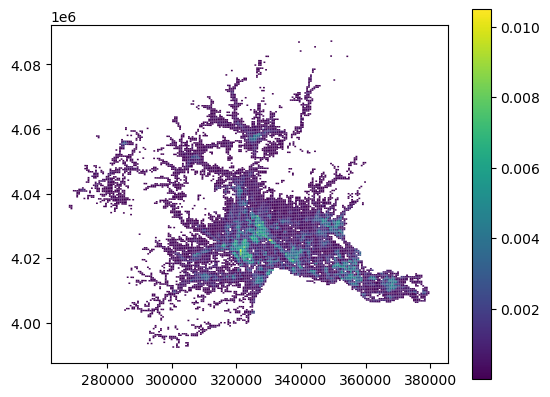

In [17]:
def plot_density(meshfile):
    #shapeファイルを読み込む
    #meshfile="500m_mesh_2018_10.shp"
    gdf = gpd.read_file(meshfile)

    #座標系を地理座標系からUTM座標系に変換
    gdf_utm = gdf.to_crs(epsg=32654)

    #各メッシュの面積を平方メートルで計算
    gdf_utm['area'] = gdf_utm.geometry.area

    #PTN_2015列にある人口を用いて人口密度を計算する。
    gdf_utm['PTN_2015'] = gdf['PTN_2015']
    gdf_utm['density'] = gdf_utm['PTN_2015']/gdf_utm['area']

    #人口密度をプロットする
    gdf_utm.plot(column='density', legend=True, cmap='viridis')
    plt.show()

In [ ]:
meshfile="500m_mesh_2018_10.shp"
plot_density(meshfile)

In [18]:
#| hide
import nbdev; nbdev.nbdev_export()